In [88]:
#uploading required files

from google.colab import files
uploaded = files.upload()


Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [89]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [90]:
#reading data from uploaded files
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')


In [91]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
"""Analysing data1""" 

'Analysing data1'

In [94]:
print("Total number of passengers in data1: ",str(len(data1)))
print('Number of survived people in data1: ',str(len(data1[data1['Survived']==1])))
print('Number of dead people in data1: ',str(len(data1[data1['Survived']==0])))

Total number of passengers in data1:  891
Number of survived people in data1:  342
Number of dead people in data1:  549


In [95]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


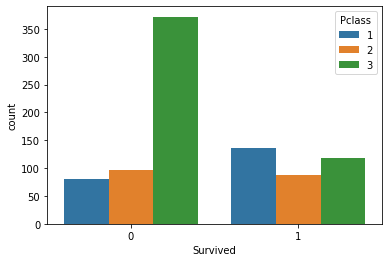

In [96]:
sns.countplot('Survived' , hue ='Pclass' , data = data1) #graph shows maximum died from Pclass 3 and max survived in Pclass 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


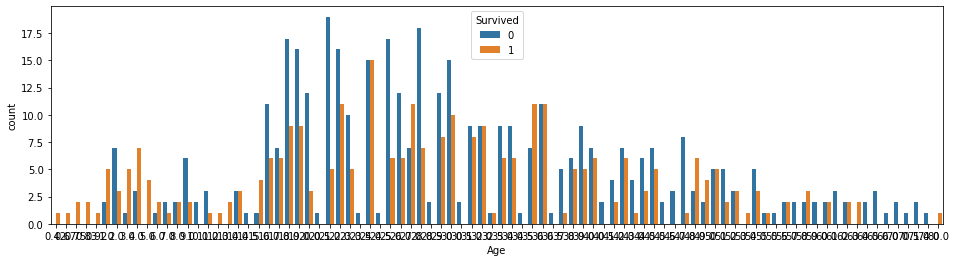

In [97]:
plt.figure(figsize = (16,4))
plt.tight_layout()
sns.countplot('Age' , hue = 'Survived' ,data= data1)
plt.show()

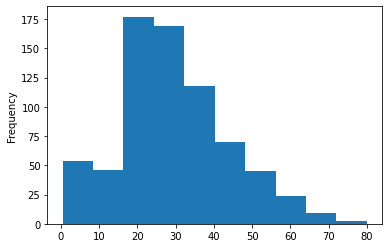

In [98]:
data1['Age'].plot.hist()


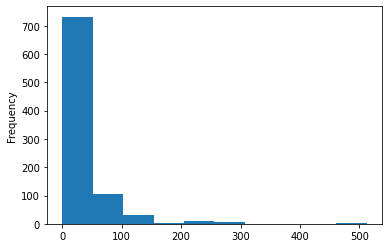

In [99]:
data1['Fare'].plot.hist()

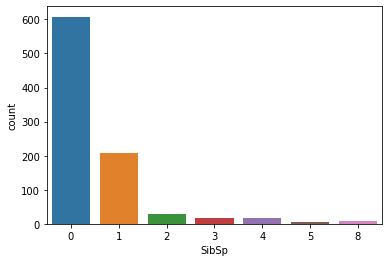

In [100]:
sns.countplot(x = 'SibSp', data = data1)

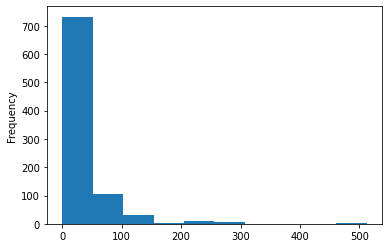

In [101]:
data1['Fare'].plot.hist()

In [103]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
N_Sex = pd.get_dummies(data1['Sex'])
N_Sex


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [105]:
N_Embarked = pd.get_dummies(data1['Embarked'])
N_Embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [106]:
N_Pclass = pd.get_dummies(data1['Pclass'])
N_Pclass

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [107]:
data1 = pd.concat([data1,N_Sex,N_Embarked,N_Pclass],axis=1)
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0,1,0,0


In [108]:
data1.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
data1.head()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [109]:
#checcking for null values
data1.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
female        0
male          0
C             0
Q             0
S             0
1             0
2             0
3             0
dtype: int64

There are null values in column 'Age'

In [110]:
#removing null values and replacing them by an average value of age

average_age = data1['Age'].mean(axis = 0)
average_age


29.69911764705882

In [111]:
data1 = data1.fillna(value = average_age)
data1.head()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [112]:
"""Test data conversion as done in data1"""

'Test data conversion as done in data1'

In [113]:
n_Sex = pd.get_dummies(data2['Sex'])
n_Embarked = pd.get_dummies(data2['Embarked'])
n_Pclass = pd.get_dummies(data2['Pclass'])
data2 = pd.concat([data2,n_Sex,n_Embarked,n_Pclass],axis=1)
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S,1,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,0,1,0,0,1


In [114]:
data2.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
data2.isnull().sum()

Age       86
SibSp      0
Parch      0
Fare       1
female     0
male       0
C          0
Q          0
S          0
1          0
2          0
3          0
dtype: int64

Some Age and Fare values are null and need to be filled

In [115]:
#Filling nll values of age with average age and fare with average fair values
average_age = data2['Age'].mean(axis = 0)
average_fare = data2['Fare'].mean(axis = 0)
avg_values = {'Age':  average_age , 'Fare' : average_fare}
data2 = data2.fillna(value = avg_values)
data2.head()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [116]:
"""Training and Defining MOdel"""

'Training and Defining MOdel'

In [117]:
X = data1.drop('Survived',axis=1)
y = data1['Survived']
X

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.000000,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,0,1,0,1,0
887,19.000000,0,0,30.0000,1,0,0,0,1,1,0,0
888,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [119]:
#introducimg Lof MOdel
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', 
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
predections = logmodel.predict(X_test)


In [121]:
"""Evaluation"""

'Evaluation'

In [122]:
#Printing Classification Report
print(classification_report(y_test, predections))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81       153
           1       0.78      0.67      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [123]:
# calculating accuracy in predictions
print(accuracy_score(y_test, predections))

0.7761194029850746


In [124]:
test_predictions = logmodel.predict(data2)

In [127]:
#final result with predictions in the dataframe
data2['Survived'] = test_predictions
data2

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3,Survived
0,34.50000,0,0,7.8292,0,1,0,1,0,0,0,1,0
1,47.00000,1,0,7.0000,1,0,0,0,1,0,0,1,0
2,62.00000,0,0,9.6875,0,1,0,1,0,0,1,0,0
3,27.00000,0,0,8.6625,0,1,0,0,1,0,0,1,0
4,22.00000,1,1,12.2875,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,0,1,0,0,1,0,0,1,0
414,39.00000,0,0,108.9000,1,0,1,0,0,1,0,0,1
415,38.50000,0,0,7.2500,0,1,0,0,1,0,0,1,0
416,30.27259,0,0,8.0500,0,1,0,0,1,0,0,1,0
